# 写一个Knn算法

In [1]:
import numpy as np
import operator
import pandas as pd
from sklearn.model_selection import train_test_split
#导入包

In [2]:
#查看数据
df = pd.read_csv('datingTestSet2.txt',sep = '\t',header = None)
df.head(2)

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2


In [3]:
#将数据分割
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [4]:
#将数据归一化
def Minmax(datas):
    data_max = datas.max()
    data_min = datas.min()
    ranges = data_max-data_min
    zero = np.zeros(np.shape(datas))
    m = datas.shape[0]
    norm = datas - np.tile(data_min,(m,1))
    norm = norm/np.tile(ranges,(m,1))
    return norm
x_train = Minmax(x_train)
x_test = Minmax(x_test)
    

In [5]:
n = len(x_train)  #用于将x_test的数据来减去每个x_train要扩张
n_test = len(x_test) #多少个test集数据，遍历用

In [6]:
y_predict = [] #装我的结果
k = 3 #设置K值
for i in range(n_test):
    diffMat = np.tile(x_test.iloc[i,:],(n,1)) - x_train   #np.tile使得第i行的数据，先变为x_train一样的格式，然后减去x_train的每一行 欧式距离中的（xi - x)
    diffMat = diffMat**2
    sumdiff = diffMat.sum(axis = 1)
    sqrdiff = sumdiff**0.5  #以上计算为计算欧式距离
    sortedDistIndicies = sqrdiff.argsort()  #将距离从小到大排序，这里得到的值就是索引值
    classCount = {}
    for t in range(3):
        a = sortedDistIndicies.reset_index().iloc[t,-1] #用这个方法得到第t行的值
        votelabel = y_train.reset_index().iloc[a,-1] #得到的是索引，什么的索引，这个索引是按从小到大排序，最小的便是值最小的那个值的索引
        classCount[votelabel] = classCount.get(votelabel,0) + 1 #get函数，字典中有votelabel就取这个键对应的值，没有就返回0
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True) 
    # operator.itemgetter 获取对象的哪个维度的数据，从大到小排序，得到投票最多的label
    y_predict.append(sortedClassCount[0][0]) #将这个label添加到我这里

In [13]:
#计算正确率
score = np.mean(y_predict == y_test)
print('正确率：%.2f%%'%(score*100))

正确率：90.00%


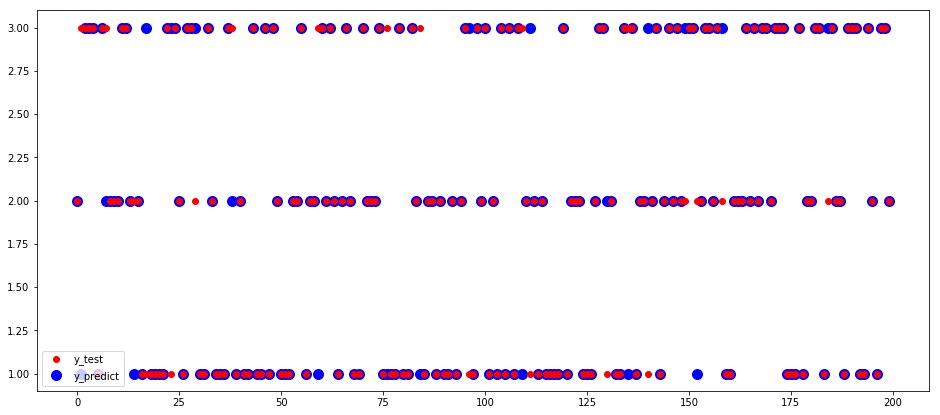

In [21]:
#画图
import matplotlib.pyplot as plt
t = range(len(x_test))
plt.figure(figsize = (16,7))
plt.plot(t,y_test,'ro',markersize = 6,zorder = 3,label = 'y_test')
plt.plot(t,y_predict,'bo',markersize = 10,zorder =2,label = 'y_predict')
plt.legend(loc = 'best')